In [17]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [18]:
# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Preprocessing
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

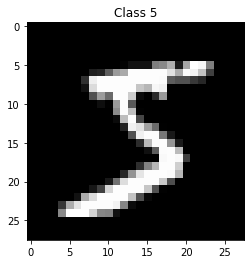

In [19]:
# Reshape
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [20]:
# Reshape data to fit model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Change to float datatype and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [21]:
number_of_classes = 10 

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [22]:
model = Sequential() # Sequential model

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # Konvolusi layer dengan 32 filter 3x3
model.add(Activation('relu')) # Menggunakan relu sebagai activation function
BatchNormalization(axis=-1) # Batch Normalization sebelum dilewatkan ke layer berikutnya
model.add(Conv2D(32, (3, 3))) # # Konvolusi layer dengan 32 filter 3x3
model.add(Activation('relu')) # Menggunakan relu sebagai activation function
model.add(MaxPooling2D(pool_size=(2,2))) # Max Pooling dengan ukuran 2x2 untuk memilih fitur terbaik

BatchNormalization(axis=-1) # Batch Normalization sebelum dilewatkan ke layer berikutnya
model.add(Conv2D(64,(3, 3))) # Konvolusi layer dengan 64 filter 3x3
model.add(Activation('relu')) # Menggunakan relu sebagai activation function
BatchNormalization(axis=-1) # Batch Normalization sebelum dilewatkan ke layer berikutnya
model.add(Conv2D(64, (3, 3))) # Konvolusi layer dengan 64 filter 3x3
model.add(Activation('relu')) # Menggunakan relu sebagai activation function
model.add(MaxPooling2D(pool_size=(2,2))) # Max Pooling dengan ukuran 2x2 untuk memilih fitur terbaik 

model.add(Flatten()) # Flatten untuk mengubah input menjadi 1 dimensi


# Fully connected layer
BatchNormalization() # Batch Normalization sebelum dilewatkan ke layer berikutnya
model.add(Dense(512)) # Dense layer dengan 512 neuron
model.add(Activation('relu')) # Menggunakan relu sebagai activation function
BatchNormalization() # Batch Normalization sebelum dilewatkan ke layer berikutnya
model.add(Dropout(0.2)) # Drouput untuk menghindari overfitting  
model.add(Dense(10)) # Dense untuk menghasilkan output 10 kelas 

model.add(Activation('softmax')) # Menggunakan softmax sebagai activation function pada output

In [23]:
model.summary() # Menampilkan summary dari model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # Kompilasi model dengan loss function categorical_crossentropy, optimizer Adam, dan metrics accuracy

In [25]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08) # Data Augmentation 

test_gen = ImageDataGenerator() # Data Augmentation

In [26]:
train_generator = gen.flow(X_train, Y_train, batch_size=64) # Generate data untuk training
test_generator = test_gen.flow(X_test, Y_test, batch_size=64) # Generate data untuk testing

In [27]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64) # Training model dengan data generator

Epoch 1/5


C:\Users\Christian\AppData\Local\Temp/ipykernel_1744/3606109085.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,


937/937 [==============================] - 89s 95ms/step - loss: 0.2091 - accuracy: 0.9337 - val_loss: 0.0302 - val_accuracy: 0.9897
Epoch 2/5
937/937 [==============================] - 87s 93ms/step - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0256 - val_accuracy: 0.9919
Epoch 3/5
937/937 [==============================] - 99s 106ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0202 - val_accuracy: 0.9932
Epoch 4/5
937/937 [==============================] - 101s 107ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0185 - val_accuracy: 0.9943
Epoch 5/5
937/937 [==============================] - 103s 110ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0156 - val_accuracy: 0.9950


In [28]:
score = model.evaluate(X_test, Y_test) # Evaluasi model
print() # Print hasil evaluasi
print('Test accuracy: ', score[1]) # Print akurasi

313/313 [==============================] - 4s 12ms/step - loss: 0.0156 - accuracy: 0.9950

Test accuracy:  0.9950000047683716


In [37]:
# Lesson Learned
# 1. Tingkat akurasi yang didapat lebih tinggi dibandingkan dengan model lainnya karena menggunakan data augmentation
# 3. RNN dapat digunakan untuk mengklasifikasikan gambar dengan hasil yang lebih baik

In [39]:
# Insight  
# 1. Data augmentation dapat digunakan untuk meningkatkan akurasi model dan mengurangi overfitting


In [40]:
# Summary
# 1. Dari hasil yang didapat, dapat disimpulkan bahwa model CNN dapat digunakan untuk mengklasifikasikan gambar dengan hasil yang lebih baik dibandingkan dengan model RNN dan dengan bantuan data augmentation dapat meningkatkan akurasi model dan mengurangi overfitting

In [ ]:
# Reference
# 1. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist
# 2. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# 3. https://www.tensorflow.org/api_docs/python/tf/keras/Model
